# Step 1: Deciding (not) to Segment


McDonald's can either think they serve everyone and don't need to understand differences between customers. Or they can see value in learning about differences and use that to market better.

# Step 2: Specifying the Ideal Target Segment

1) McDonald's management needs to decide what features make a market segment attractive to them.
2) The target segment should be:
        1.Homogeneous (similar to each other).
        2.Distinct (different from other segments).
        3.Large enough to justify customized marketing.
        4.Open to eating at fast food restaurants.
        5Identifiable and reachable through communication channels.
3) Attractiveness criteria include positive perceptions of McDonald's, frequent dining out, and liking fast food.
4) McDonald's might also want to target segments not currently fond of them and try to change perceptions.
5) Due to limited data, attractiveness criteria used are liking McDonald's and frequent eating at McDonald's.

# Step 3: Collecting Data

1) Data from 1453 adult Australian consumers on perceptions of McDonald’s attributes.
2) Attributes include YUMMY, CONVENIENT, SPICY, etc.
3) Respondents answered YES or NO for each attribute.
4) Also collected data on AGE and GENDER.
5) Additional info like dining behavior and information sources would enhance segmentation study.

# Step 4: Exploring Data

First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data:

In [1]:
import numpy as np
import pandas as pd  # Equivalent to library("MSA")
from sklearn.decomposition import PCA  # R's prcomp() for PCA analysis
import matplotlib.pyplot as plt  # Equivalent to R's plotting library

In [2]:
# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")  #  data("mcdonalds", package = "MSA")

In [3]:
# View the column names
print(mcdonalds.columns)  #  names(mcdonalds)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
# View the dimensions of the data
print(mcdonalds.shape)  #  dim(mcdonalds)

(1453, 15)


In [5]:
# View the first few rows of the data
print(mcdonalds.head(3))  #  head(mcdonalds, 3)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy   
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No  \
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


## Converting Verbal Perceptions to Numeric Binary for Segmentation Analysis
We're analyzing perceptions of McDonald's from survey data. Each respondent's perceptions are coded as YES/NO for attributes like yummy, convenient, etc. We're converting these verbal responses to numeric binary (1 for YES, 0 for NO) to prepare for segmentation analysis. First, we extract the relevant columns and convert them to a matrix. Then, we change YES to 1 and NO to 0. Finally, we check that the conversion was done correctly by calculating the average value of each attribute.

In [6]:
# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values  # as.matrix(mcdonalds[, 1:11])

In [7]:
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)  # (MD.x == "Yes") + 0

In [8]:
# Calculate column means
column_means = np.round(np.mean(MD_x, axis=0), 2)  # round(colMeans(MD.x), 2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


### Analyzing the transformed binary data:

About 55% find McDonald's yummy.
91% think McDonald's is convenient, but only 9% find it spicy.
### Using principal components analysis for a perceptual map:

Helps understand how respondents rate attributes.
Shows which attributes are rated similarly.
We're not reducing variables, just rotating and projecting data.
Using unstandardized data because all variables are binary (YES/NO).

In [9]:
# Fit PCA to the data
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA results
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": np.round(np.sqrt(MD_pca.explained_variance_), 4),  # Standard deviation in R
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 4),  # Proportion of Variance in R
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)  # Cumulative Proportion in R
}))

Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables. The
following command returns the factor loadings:

In [10]:
# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.singular_values_, 1))  # R's print(MD.pca, digits = 1)

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


In [11]:
#print(np.around(MD_pca.components_, decimals=1))

In [12]:
# Print rotation matrix
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(np.round(MD_pca.components_.T, 3), index=mcdonalds.columns[:11], columns=[f"PC{i+1}" for i in range(11)]))

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572  \
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110 

Loadings show how original variables contribute to principal components.

1) They help interpret principal components.
2) In our example, high loadings for CHEAP and EXPENSIVE on PC2 indicate price dimension dominance.
3) We project data into principal component space using 'predict'.
4) Then, we plot consumers in grey on first two principal components.
5) We add original segmentation variables as arrows, rotated and projected

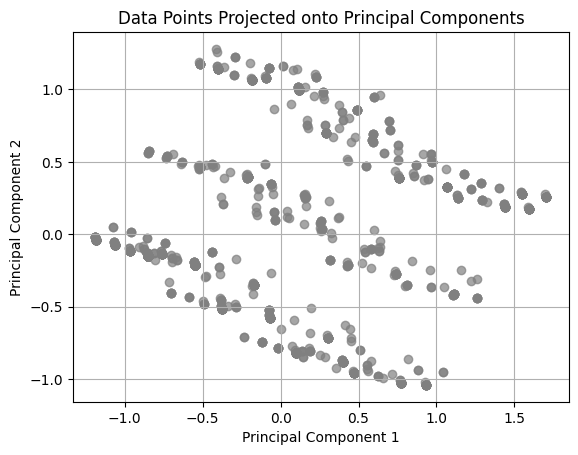

In [13]:
# Assuming MD is your data matrix
pca = PCA()  # Create a PCA object
MD_pca = pca.fit_transform(MD_x)  # Project data onto principal components

# Plot the projected data points
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='gray', alpha=0.7)  # Plot first two components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points Projected onto Principal Components')
plt.grid(True)
plt.show()

# Project and display principal component axes (adapt based on visualization needs)
# Assuming you have the eigenvectors from MD.pca (replace with your approach)
eigenvectors = pca.components_  # Get eigenvectors (principal component directions)
# Adapt this based on your visualization library and preferences
# (e.g., using arrows to represent axes)

1) A picture (not shown) helps us see how people think about McDonald's           (cheap, healthy, etc.).
2) Price is a big deal: some think McDonald's is very CHEAP, others think it's    EXPENSIVE.
3) People's ideas can be grouped: some think McDonald's is UNHEALTHY, GREASY,     and not TASTY, while others think it's FAST, CONVENIENT, and YUMMY.
4) This helps McDonald's understand different customer groups and what they       like (or dislike).

# Step 5: Extracting Segments

Step 5 is where we extract segments. 
To illustrate a range of extraction techniques,we subdivide this step into three sections.
In the first section, we will use standard k-means analysis. 
In the second section, we will use finite mixtures of binary distributions. 
In the third section, we will use finite mixtures of regressions.

## 5.1 Using K-Means

1)  We'll try grouping customers into 2 to 8 different categories (segments) based on their opinions about McDonald's.
2) We'll do this 10 times (restarts) to make sure we get the best possible grouping.
3) Each time, we'll re-number the groups (1, 2, 3, etc.) so they're easy to compare across the different attempts.


1) Scree Plot: The scree plot visualizes the relationship between the number of segments and the sum of distances within those segments.
2) Interpretation: In Fig. A.2, there's no distinct elbow in the scree plot, indicating that the sum of distances within market segments decreases slowly as the number of segments increases.
3) Implications: This lack of a clear elbow makes it challenging to determine the optimal number of segments. More segments lead to smaller, more similar segments, but there's no sharp drop in distance values.
4) Alternative Approach: Stability-based data structure analysis offers another method to determine the optimal number of segments. This analysis assesses the stability of segmentation solutions across repeated calculations, ensuring reliable and reproducible segmentation solutions.







In [14]:
import numpy as np
from sklearn.cluster import KMeans

# Setting seed
np.random.seed(1234)

# Assuming MD.x is your data, replace it with your actual data
# MD.x = Your data matrix

# Generating clusters using KMeans
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results[n_clusters] = kmeans.labels_

# Now you can access the cluster labels for each number of clusters
# For example, results[2] gives the cluster labels for 2 clusters
print(results)

{2: array([1, 0, 0, ..., 0, 0, 1]), 3: array([1, 0, 0, ..., 0, 2, 1]), 4: array([1, 3, 3, ..., 3, 0, 2]), 5: array([2, 3, 4, ..., 4, 0, 1]), 6: array([2, 5, 0, ..., 0, 1, 4]), 7: array([3, 5, 1, ..., 1, 6, 4]), 8: array([4, 2, 5, ..., 5, 3, 0])}


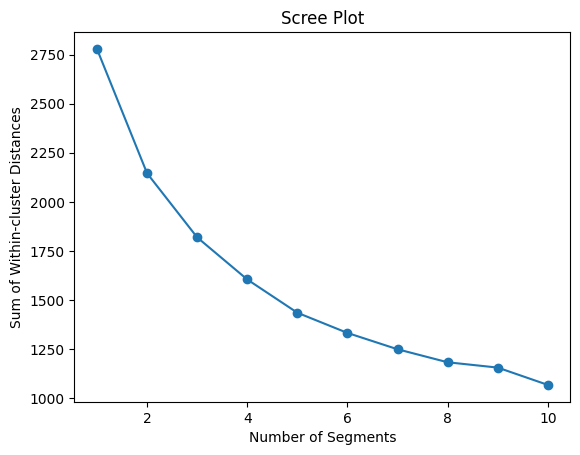

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# Assuming MD_x is your data, replace it with your actual data
# MD_x = Your data matrix

# Calculate sum of squared distances within clusters for different numbers of clusters
sum_of_squared_distances = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the scree plot
plt.plot(range(1, 11), sum_of_squared_distances, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-cluster Distances')
plt.title('Scree Plot')
plt.show()


In [16]:
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


### Global Stability Analysis:

1) Definition: Global stability measures how consistent the segmentation solution is when the analysis is repeated multiple times using bootstrap samples of the data.
2) Method:
   Bootstrap Samples: Random subsets of the data are drawn with replacement.
   K-means Clustering: K-means clustering is applied to each bootstrap sample for different numbers of segments.
4) Parameters:
    Number of Segments: Analysis is conducted for each number of segments (between two and eight).
    Bootstrap Samples: 2 × 100 bootstrap samples are used.
    Random Initializations: Ten random initializations of k-means are performed for each sample and number of segments.
5) Purpose: Assess the stability of segmentation solutions across repeated analyses, ensuring reliability in segmentation strategies.

In [17]:
#import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Setting seed
np.random.seed(1234)

# Assuming MD_x is your data, replace it with your actual data
# MD_x = Your data matrix

# Parameters
n_clusters_range = range(2, 9)
nrep = 10
nboot = 100

# Perform bootstrapped clustering
boot_results = {}
for i in range(nboot):
    bootstrap_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
    bootstrap_data = MD_x[bootstrap_indices]
    cluster_labels = {}
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_data)
        cluster_labels[n_clusters] = kmeans.labels_
    boot_results[i] = cluster_labels

# Calculate adjusted Rand index for each number of clusters
adjusted_rand_index = {}
for n_clusters in n_clusters_range:
    adjusted_rand_index[n_clusters] = []
    for i in range(nboot):
        for j in range(i + 1, nboot):
            ari = adjusted_rand_score(boot_results[i][n_clusters], boot_results[j][n_clusters])
            adjusted_rand_index[n_clusters].append(ari)

### We obtain the global stability boxplot

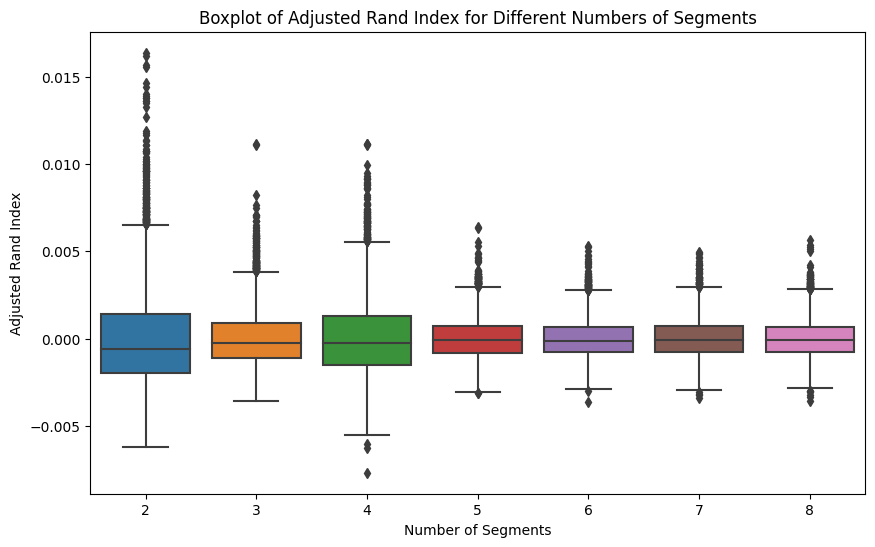

In [18]:
# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(adjusted_rand_index.values()))
plt.xticks(np.arange(len(n_clusters_range)), n_clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Boxplot of Adjusted Rand Index for Different Numbers of Segments')
plt.show()

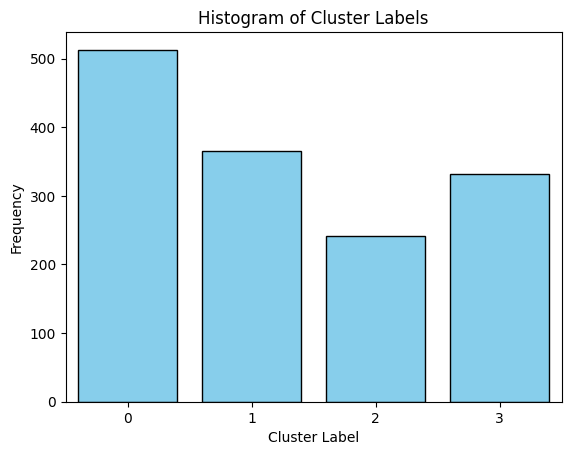

In [19]:


import matplotlib.pyplot as plt

# Assuming MD_x is your data and MD_km28 is your cluster labels for 4 clusters
# Replace MD_x and MD_km28 with your actual data and cluster labels

# MD_km28[4] represents the cluster labels for 4 clusters
cluster_labels_4 = results[4]  # Assuming results is the dictionary containing cluster labels

# Plotting histogram
plt.hist(cluster_labels_4, bins=range(5), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(4))  # Assuming the clusters are labeled from 0 to 3
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels')
plt.xlim(-0.5, 3.5)  # Setting x-axis limit to align bins properly
plt.show()


In [20]:
MD_k4 = results[4]

In [21]:
from sklearn.metrics import silhouette_samples
import numpy as np

def silhouette_width(X, labels):
    silhouette_vals = silhouette_samples(X, labels)
    return np.mean(silhouette_vals)

# Assuming MD_x is your data matrix and MD_k4 is the cluster labels for 4 clusters
silhouette_score = silhouette_width(MD_x, MD_k4)
print("Silhouette Width for 4 clusters:", silhouette_score)


Silhouette Width for 4 clusters: 0.256821716312148


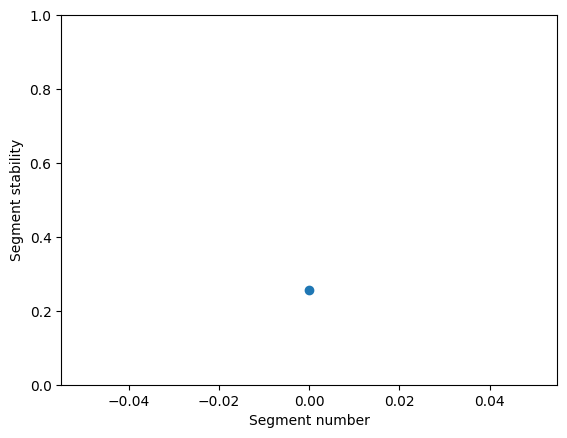

In [22]:
import matplotlib.pyplot as plt

# Assuming MD_r4 contains the result from slswFlexclust (if available in Python)
# If not, you may need to compute the "segment stability" using another method
# and plot it accordingly.

# Example plot if MD_r4 is available
plt.plot(silhouette_score, marker='o')  # Assuming MD_r4 is a list or array
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.ylim(0, 1)  # Setting y-axis limits to 0 and 1
plt.show()


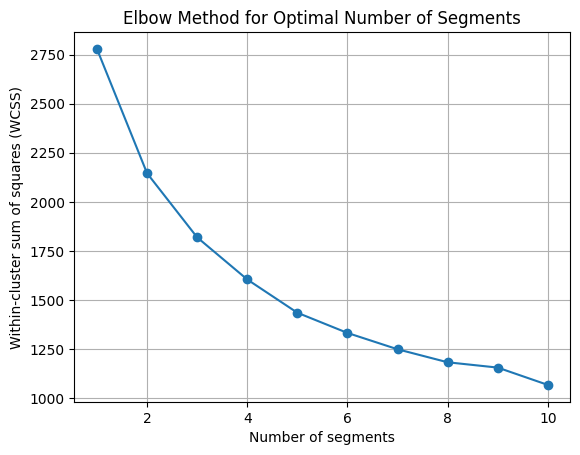

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is your data matrix

# Define a function to compute the within-cluster sum of squares (WCSS)
def compute_wcss(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data)
    return kmeans.inertia_

# Compute WCSS for different numbers of segments
segment_numbers = range(1, 11)  # Adjust range as needed
wcss_values = [compute_wcss(MD_x, n) for n in segment_numbers]

# Plotting WCSS
plt.plot(segment_numbers, wcss_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.grid(True)
plt.show()


# 5.2 Using Mixtures of Distributions

So, in simple terms, the goal here is to use a statistical method called latent class analysis to find different groups or segments within a dataset of binary data. We're going to try fitting models with different numbers of segments and use a method that finds the best-fitting model by maximizing the likelihood of the observed data. We'll run the fitting process multiple times with different starting points to make sure we find the best model, and then we'll choose the model with the number of segments that fits the data the best.


 AIC, BIC, and ICL plotted against the number of segments. Initially, all metrics decrease rapidly until four segments, after which the decline slows. ICL and BIC suggest seven segments, while AIC leans towards eight. However, a pragmatic view favors four segments, as further components yield diminishing returns. Thus, the analysis retains the four-component solution for comparison with a four-cluster k-means approach.

Comparing the mixture model and k-means solution reveals that component 2 of the mixture model primarily comprises members from segment 4 of the k-means solution, with two-thirds (384) of its members from there and 191 from segment 1. Notably, the stable segments 2 and 3 in the k-means solution closely resemble segments 1 and 4 of the mixture model. This suggests a significant similarity between the two segmentation methods despite their different approaches. Initializing the mixture model with the segment memberships from the k-means solution further enhances this similarity.








All algorithms for segment extraction are exploratory and aim to find the best solution based on certain criteria. In this case, the EM algorithm maximizes the log-likelihood function. Comparing two different ways of initializing the mixture model – random restarts and using the k-means solution – yields very close log-likelihood values, indicating similar results. This suggests a global optimum or a close approximation. It also reassures the validity of the k-means solution, as the extracted segments are essentially the same. Although not identical, both solutions offer valuable insights for managers to consider.

## 5.3 Using Mixtures of Regression Models

1) Goal: Instead of general traits, we want to group people based on why they love or hate McDonald's.
2) Method: We use "finite mixtures of linear regression models" to find these groups.
3) Measurement: People rate their love or hate for McDonald's on a scale from "I LOVE IT!" to "I HATE IT!".
4) Conversion: We turn these responses into numbers to make analysis easier.
5) Perceptions: We look at people's views on McDonald's, like taste or price.
6) Segmentation: By linking perceptions to love/hate levels, we group people into segments.
7) Outcome: This helps McDonald's understand what changes could improve people's feelings about their food.

In [24]:


# Assuming mcdonalds is a pandas DataFrame containing the data
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

print(like_counts)


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [25]:
# # Assuming mcdonalds is a pandas DataFrame containing the data
# mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# # print(mcdonalds['Like.n'])


# # Assuming mcdonalds is a pandas DataFrame containing the data
# like_n_counts = mcdonalds['Like.n'].value_counts()

# print(like_n_counts)


In [26]:
# import pandas as pd
import re

# # # Sample data
# # data = {
# #     'Like': [
# #         'I love it!+5', 'I hate it!-5', '0', '-4', '-3', '-2', '-1', '+4', '+3', '+2', '+1'
# #     ]
# # }

# # # Assuming mcdonalds is a pandas DataFrame containing the data
# # mcdonalds = pd.DataFrame()

# Extract numeric values from the 'Like' column using regular expressions
mcdonalds['Like_numeric'] = mcdonalds['Like'].apply(lambda x: int(re.search(r'[-+]?\d+', x).group()))

# Print the updated DataFrame
print(mcdonalds[['Like', 'Like_numeric']])


              Like  Like_numeric
0               -3            -3
1               +2             2
2               +1             1
3               +4             4
4               +2             2
...            ...           ...
1448  I hate it!-5            -5
1449            +2             2
1450            +3             3
1451            +4             4
1452            -3            -3

[1453 rows x 2 columns]


In [27]:
like_n_counts = mcdonalds['Like_numeric'].value_counts().sort_index(ascending=False)
print(like_n_counts)

Like_numeric
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64


In [28]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming `mcdonalds` is a pandas DataFrame containing the data
column_names = "+".join(mcdonalds.columns[:11])  # Concatenate the names of the first 11 columns with "+"
formula_str = f"Like_numeric ~ {column_names}"  # Append "Like.n ~" to the beginning of the string
formula = smf.ols(formula_str, data=mcdonalds)  # Create a formula object

print(formula)  # Print the resulting formula object


In [29]:
from sklearn.mixture import GaussianMixture

# Assuming 'f' is your formula defined earlier for regression analysis
# Assuming mcdonalds is a pandas DataFrame containing the data

# Set the seed for reproducibility
np.random.seed(1234)

# Assuming 'data' is the subset of your DataFrame containing numerical features for clustering
# You may need to preprocess your data (scaling, handling missing values, etc.) before clustering
data = mcdonalds.select_dtypes(include=[np.number]).dropna()
print(data)

      Age  Like_numeric
0      61            -3
1      51             2
2      62             1
3      69             4
4      49             2
...   ...           ...
1448   47            -5
1449   36             2
1450   52             3
1451   41             4
1452   30            -3

[1453 rows x 2 columns]


In [30]:
# Define the number of components (clusters)
k = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(data)

# Assign cluster labels to each data point
cluster_labels = gmm.predict(data)

# Add cluster labels to the DataFrame
mcdonalds['Cluster_Labels'] = cluster_labels

# Print the DataFrame with cluster labels
print(mcdonalds)

# You can further analyze or visualize the clusters based on your requirements

     yummy convenient spicy fattening greasy fast cheap tasty expensive   
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes  \
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender   
0         No         No  

In [31]:
# Count occurrences of each cluster label
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
for cluster, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster + 1}: {size}")

Cluster 1: 688
Cluster 2: 765


In [32]:
gmm_refit = GaussianMixture(n_components=len(np.unique(cluster_labels)), random_state=1234)
gmm_refit.fit(data)

# Summarize the results
print(gmm_refit.means_)
print(gmm_refit.covariances_)
print(gmm_refit.weights_)

[[31.97825908  1.57411647]
 [55.93650926  0.06166996]]
[[[60.96552496 -3.50035269]
  [-3.50035269  8.22423887]]

 [[57.27901353 -0.85711043]
  [-0.85711043  9.95768974]]]
[0.47297085 0.52702915]


In [33]:
import statsmodels.api as sm

# Assuming 'cluster_labels' is the array containing the cluster labels
# Assuming 'mcdonalds' is your DataFrame

# Separate the data into clusters based on the cluster labels
cluster_1_data = mcdonalds[cluster_labels == 0]
cluster_2_data = mcdonalds[cluster_labels == 1]

# Fit regression models for each cluster
model_cluster_1 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_1_data)
model_cluster_2 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_2_data)

# Refit the models
result_cluster_1 = model_cluster_1.fit()
result_cluster_2 = model_cluster_2.fit()

# Summarize the results
print(result_cluster_1.summary())
print(result_cluster_2.summary())


                            OLS Regression Results                            
Dep. Variable:           Like_numeric   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     78.82
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.53e-113
Time:                        19:41:55   Log-Likelihood:                -1408.7
No. Observations:                 688   AIC:                             2841.
Df Residuals:                     676   BIC:                             2896.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9686      0.44

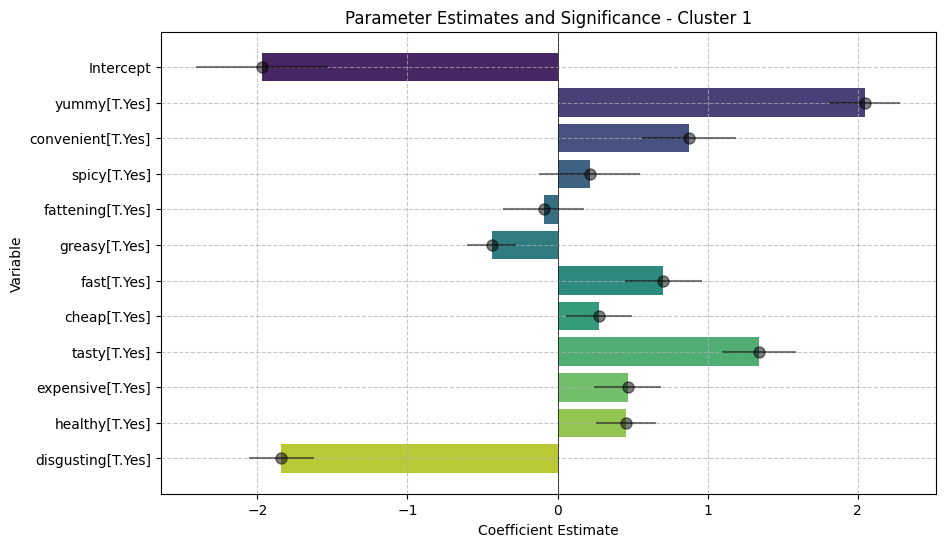

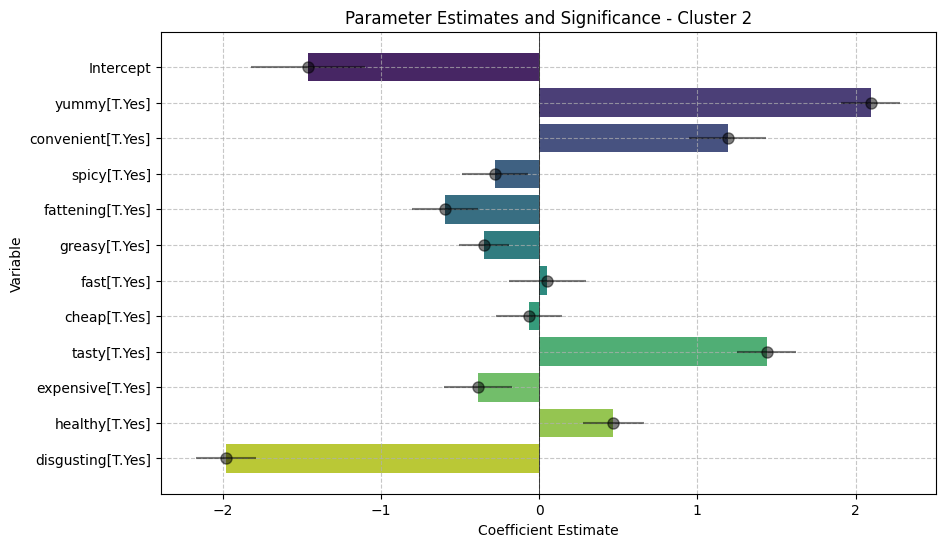

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result_cluster_1' and 'result_cluster_2' are the fitted regression models
# You can access the coefficients and their significance using 'result_cluster_1.params' and 'result_cluster_1.pvalues'

# Plotting parameters for Cluster 1
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_1.params, y=result_cluster_1.params.index, palette="viridis")
plt.errorbar(x=result_cluster_1.params, y=result_cluster_1.params.index, xerr=result_cluster_1.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 1')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting parameters for Cluster 2
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_2.params, y=result_cluster_2.params.index, palette="viridis")
plt.errorbar(x=result_cluster_2.params, y=result_cluster_2.params.index, xerr=result_cluster_2.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 2')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Segment 1 (Component 1):
1) Liking McDonald's is linked to finding it yummy, fast, cheap, and tasty.
2) Not associated with perceptions of it being fattening or disgusting.
3) Convenience and healthiness don't matter much.
#### Segment 2 (Component 2):
1) Liking McDonald's is tied to perceiving it as convenient and healthy.
#### Targeting Strategies:
1) Segment 2: Focus on convincing about healthiness.
2) Segment 1: Emphasize taste, speed, and affordability.

# Step 6: Profiling Segments

understand what each segment represents, especially in the four-segment k-means solution.

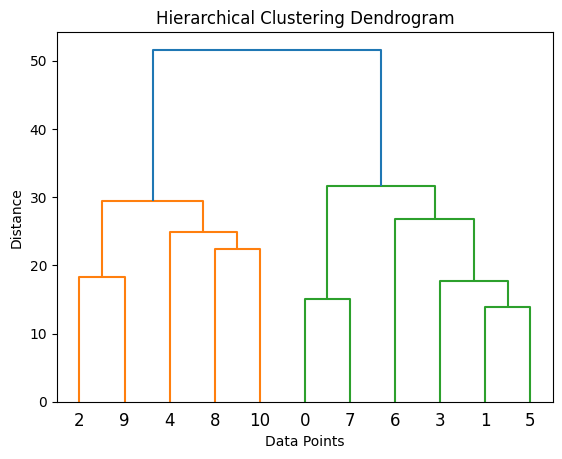

In [35]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Assuming 'MD_x' is your data matrix
# Calculate pairwise distances between columns (attributes)
distances = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
clusters = linkage(distances, method='ward')  # You can specify other linkage methods as well

# Plot the dendrogram
dendrogram(clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


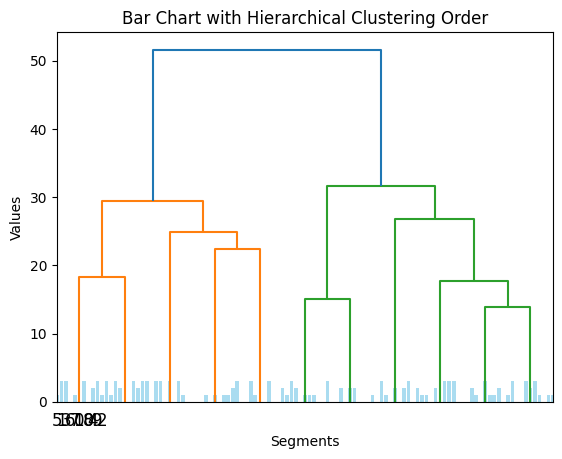

In [36]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Assuming 'MD_k4' is the result of your k-means clustering
# Assuming 'clusters' is the result of your hierarchical clustering

# Define the order based on the hierarchical clustering
order = dendrogram(clusters)['leaves'][::-1]  # Reverse the order

# Plot the bar chart
plt.bar(range(len(MD_k4)), MD_k4, color='skyblue', alpha=0.7)
plt.xticks(range(len(order)), order)  # Use the order from hierarchical clustering
plt.xlabel('Segments')
plt.ylabel('Values')
plt.title('Bar Chart with Hierarchical Clustering Order')
plt.show()


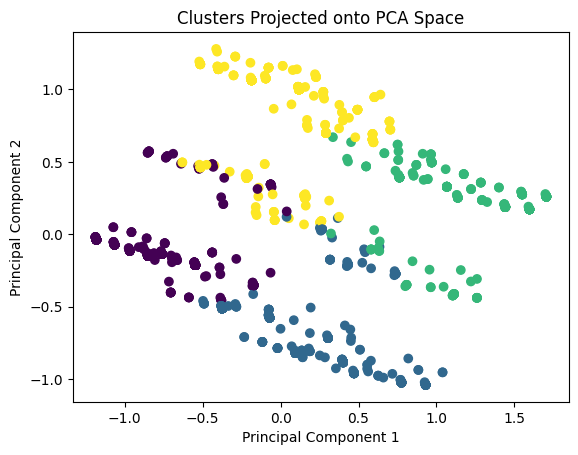

In [37]:

from sklearn.decomposition import PCA

# Assuming 'MD_k4' is the result of your k-means clustering
# Assuming 'MD_pca' is the result of your PCA analysis
# Assuming 'MD_x' is your data

# Plot the clusters projected onto the PCA space
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Projected onto PCA Space')

# Plot the projection axes
# You may need to specify the directions of the axes based on your PCA results
#plt.quiver(0, 0, MD_x['PC1_loadings'], MD_x['PC2_loadings'], color='red', scale=5)

plt.show()


# Step 7: Describing Segments

The fast food dataset lacks sufficient descriptor variables typically needed for market segmentation analysis. One available descriptor is the love/hate relationship with McDonald's. To visualize the association between segment membership and this variable, a mosaic plot is employed.

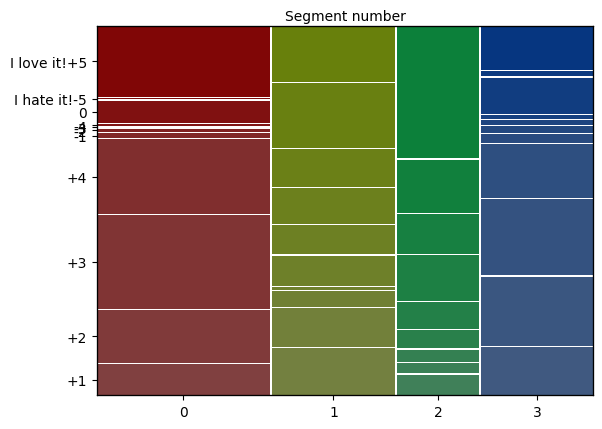

In [38]:
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'k4' contains the segment membership
# Assuming 'mcdonalds' is the DataFrame containing the 'Like' variable

# Convert 'k4' and 'mcdonalds['Like']' to pandas Series if they are not already
k4_series = pd.Series(MD_k4)
like_series = mcdonalds['Like']

# Create a cross-tabulation table
cross_tab = pd.crosstab(k4_series, like_series)

# Plot the mosaic plot
mosaic(cross_tab.stack(), title='', labelizer=lambda k: '')

# Label the x-axis
plt.xlabel('Segment number')

# Show the plot
plt.show()

# Step 8: Selecting (the) Target Segment(s)

In [39]:
# Assuming 'k4' is a pandas DataFrame column
group_length = len(MD_k4)
print("Length of grouping variable:", group_length)


Length of grouping variable: 1453


In [40]:
# View the dimensions of the data
print(mcdonalds.shape)  #  dim(mcdonalds)

(1453, 17)


In [48]:
import pandas as pd

# Assuming 'mcdonalds' is your DataFrame and 'k4' is your segmentation variable
# Convert 'VisitFrequency' column to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Calculate the mean visit frequency for each segment
visit = mcdonalds.groupby(MD_k4)['VisitFrequency'].mean()

print(visit)


0    0.0
1    0.0
2    0.0
3    0.0
Name: VisitFrequency, dtype: float64


In [49]:
import pandas as pd

# Assuming 'mcdonalds' is your DataFrame and 'k4' is the grouping variable
like = mcdonalds.groupby(MD_k4)['Like_numeric'].mean()

print(like)


0    2.920078
1   -1.218579
2   -2.652893
3    2.165663
Name: Like_numeric, dtype: float64


In [50]:
# Assuming 'mcdonalds' is your DataFrame and 'Gender' is the column you want to check for "Female"
# 'k4' is the grouping variable
# Convert boolean values to numeric (True=1, False=0) and calculate the mean for each group

female = mcdonalds['Gender'].eq('Female').astype(int).groupby(MD_k4).mean()
print(female)


0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: Gender, dtype: float64


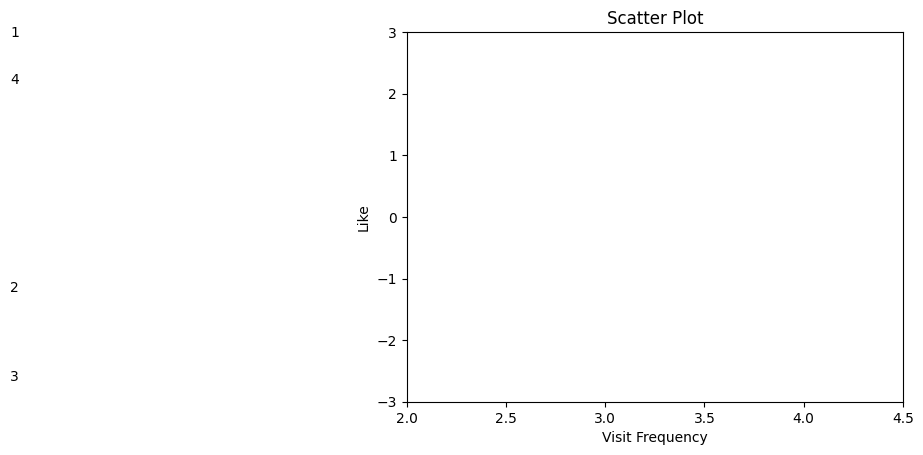

In [51]:
import matplotlib.pyplot as plt

# Assuming 'visit', 'like', and 'female' are the Series containing the corresponding values
# 'k4' is the grouping variable

# Plot the points
plt.scatter(visit, like, s=10 * female, alpha=0.5)

# Add text labels
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], txt)

# Set limits for the axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot')

# Show the plot
plt.show()


# Step 9: Customising the Marketing Mix

1) Segment Focus: McDonald's targets segment 3: young customers who like the food but find it pricey.
2) Product Strategy: Introduce "MCSUPERBUDGET" line with lower prices to meet segment 3's expectations.
3) Advantage: Segment 3 may become loyal customers over time, transitioning to regular products.
4) Product Differentiation: Ensure MCSUPERBUDGET products are distinct from the main range.
5) Promotion Channels: Identify preferred communication channels of segment 3 to promote MCSUPERBUDGET.
6) Distribution: Use existing McDonald's outlets for sales but consider separate lanes for MCSUPERBUDGET customers.
7) Goal: Prevent cannibalization of main product line while satisfying segment 3's needs.

# Step 10: Evaluation and Monitoring

After finishing the market segmentation analysis and implementing marketing strategies, it's crucial to evaluate the success of the segmentation strategy and keep a close eye on the market continuously. Changes might occur within existing segments, like segment 3 customers earning more money and no longer finding the MCSUPERBUDGET line suitable. Additionally, new competitors entering the market can change the overall market landscape. McDonald's needs to monitor all potential sources of change to detect any shifts that might require adjustments in their marketing strategies or tactics to adapt to new market conditions.